##### Read the data

In [722]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import math
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [723]:
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

In [724]:
# Read the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [725]:
# taking Id-s from test data for the prediction
test_id = test.Id

In [726]:
train.shape

(1460, 81)

In [727]:
test.shape

(1459, 80)

In [728]:
# train.columns.tolist()

In [729]:
# test.columns.tolist()

In [730]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [731]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.00,1460.00,1201.00,1460.00,1460.00,1460.00,1460.00,1460.00,1452.00,1460.00,...,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00
mean,730.50,56.90,70.05,10516.83,6.10,5.58,1971.27,1984.87,103.69,443.64,...,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82,180921.20
std,421.61,42.30,24.28,9981.26,1.38,1.11,30.20,20.65,181.07,456.10,...,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,79442.50
min,1.00,20.00,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.00
25%,365.75,20.00,59.00,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129975.00
50%,730.50,50.00,69.00,9478.50,6.00,5.00,1973.00,1994.00,0.00,383.50,...,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,163000.00
75%,1095.25,70.00,80.00,11601.50,7.00,6.00,2000.00,2004.00,166.00,712.25,...,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.00
max,1460.00,190.00,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,...,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00,755000.00


#### Data cleaning

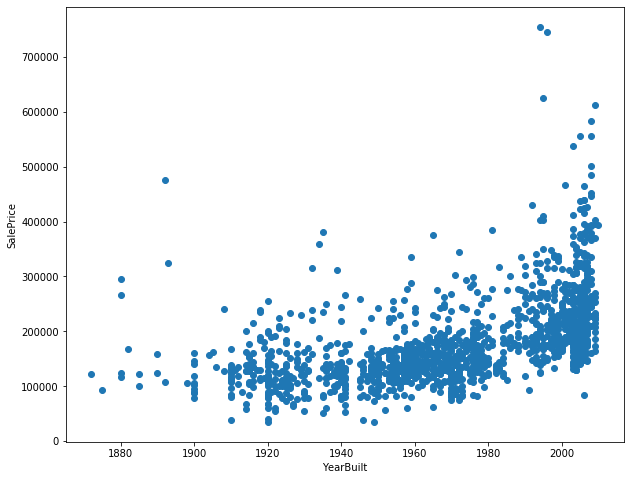

In [732]:
plt.figure(figsize = (10,8))
plt.scatter(train['YearBuilt'], train['SalePrice'])
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.show()

In [733]:
# removing some suspicious records for houses with high price and built before 1900
train.drop(train[(train.YearBuilt < 1900) & (train.SalePrice > 300000)].index, axis=0, inplace=True)

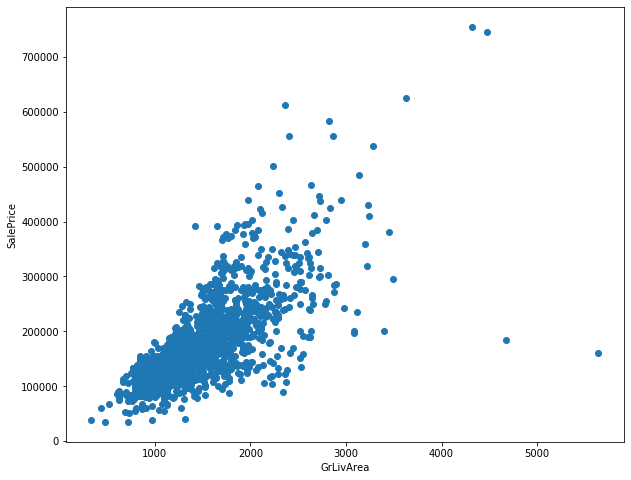

In [734]:
plt.figure(figsize = (10,8))
plt.scatter(train['GrLivArea'], train['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

In [735]:
# removing some suspicios records for housed that have big area and small price
train.drop(train[(train.GrLivArea > 4000) & (train.SalePrice < 200000)].index, axis=0, inplace=True)

In [736]:
# search features having a lot of missing values
train.isnull().mean()[train.isnull().mean() > 0].sort_values(ascending=False)

PoolQC         1.00
MiscFeature    0.96
Alley          0.94
Fence          0.81
FireplaceQu    0.47
LotFrontage    0.18
GarageYrBlt    0.06
GarageType     0.06
GarageFinish   0.06
GarageQual     0.06
GarageCond     0.06
BsmtFinType2   0.03
BsmtExposure   0.03
BsmtFinType1   0.03
BsmtCond       0.03
BsmtQual       0.03
MasVnrArea     0.01
MasVnrType     0.01
Electrical     0.00
dtype: float64

In [737]:
# remove features with more than 80% of missing values (not informative), and Id feature
train.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'Id'], axis=1, inplace =True)
test.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'Id'], axis=1, inplace =True)

In [738]:
train = train.reset_index(drop=True)

#### Train/test concat

In [739]:
# concateneting train and test df to encode categorical features in the same way
df = pd.concat([train, test])

In [740]:
df.shape

(2915, 76)

In [741]:
# separate categorical and numerical features
categorical_features = df.select_dtypes(include=['object']).columns
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns


In [742]:
categorical_features

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [743]:
numerical_features

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [744]:
df[numerical_features].isna().sum()[df[numerical_features].isna().sum()>0]

LotFrontage      486
MasVnrArea        23
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
GarageYrBlt      159
GarageCars         1
GarageArea         1
SalePrice       1459
dtype: int64

In [745]:
features_with_na = ['LotFrontage', 'MasVnrArea','BsmtFinSF1',
                   'BsmtFinSF2', 'BsmtUnfSF','BsmtUnfSF',
                   'TotalBsmtSF', 'BsmtFullBath','BsmtHalfBath',
                   'GarageYrBlt','GarageCars','GarageArea']

In [746]:
# replace missing numeric values with the mean
df[features_with_na] = df[features_with_na].fillna(df[features_with_na].median()[0])

In [747]:
# df[features_with_na].isna().sum()[df[features_with_na].isna().sum()>0]

In [748]:
# replace missing categorical values with the mode
df[categorical_features].fillna(df[categorical_features].mode().iloc[0], inplace=True)

C:\Users\Katya\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [749]:
print("Number of numerical features : " + str(len(numerical_features)))
print("Number of categorical features : " + str(len(categorical_features)))

Number of numerical features : 37
Number of categorical features : 39


##### Categorical features encoding

In [750]:
# dummy variables

df_cat = pd.get_dummies(df[categorical_features])
df_cat.shape

(2915, 238)

##### Numerical features

In [751]:
df_num = df[numerical_features]
df_num.shape

(2915, 37)

##### Modelling

In [752]:
df_cat_num = pd.concat([df_cat, df_num], axis=1)

In [753]:
df_cat_num.SalePrice.notna().sum()

1456

In [754]:
df_cat_num.SalePrice.isna().sum()

1459

 - initial train/test datasets'd be separated again:
    - train1 df - would be split for train/test for search of best model
    - test1 df - would be used for making prediction

In [755]:
# split train/test datasets
train1 = df_cat_num.iloc[:1456,:]
test1 = df_cat_num.iloc[-1459:,:]

In [756]:
X = train1
y = X.SalePrice
X.drop(['SalePrice'], axis=1, inplace=True)

C:\Users\Katya\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [757]:
print('X shape', X.shape)
print('y shape', y.shape)

X shape (1456, 274)
y shape (1456,)


In [758]:
# train/test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

In [759]:
# X_train.shape

In [760]:
# X_test.shape

##### Linear Regression

In [761]:
reg = LinearRegression()
reg.fit(X_train, y_train)
test_pred = reg.predict(X_test)
train_pred = reg.predict(X_train)
print('rmse on train', math.sqrt(mean_squared_error(y_train, train_pred)))
print('rmse on test', math.sqrt(mean_squared_error(y_test, test_pred)))

rmse on train 19010.51588747737
rmse on test 101029813.22447014


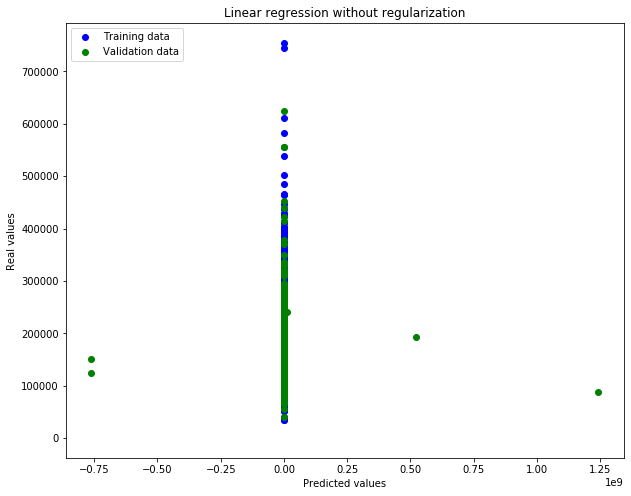

In [762]:
# scatter plot for real vs predicted values

plt.figure(figsize=(10,8))
plt.scatter(train_pred, y_train, c = "blue",  label = "Training data")
plt.scatter(test_pred, y_test, c = "green",  label = "Validation data")
plt.title("Linear regression without regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10, 14], [10, 14], c = "black")
#plt.xlim((10,14))
#plt.ylim((10,14))
plt.show()

In [781]:
reg.score(X_test,y_test)

-1503512.8043115682

 - Ridge

In [763]:
# Ridge regression

reg_r = Ridge(alpha=1.0)
reg_r.fit(X_train, y_train)
test_pred = reg_r.predict(X_test)
train_pred = reg_r.predict(X_train)
print('rmse on train', math.sqrt(mean_squared_error(y_train, train_pred)))
print('rmse on test', math.sqrt(mean_squared_error(y_test, test_pred)))

rmse on train 19234.480438455106
rmse on test 24421.802322763186


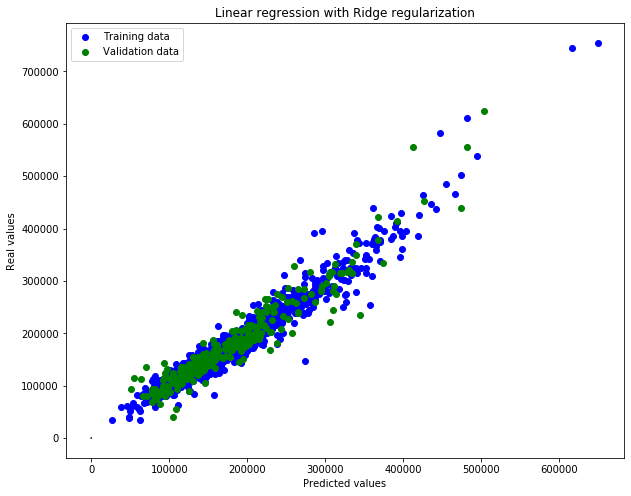

In [764]:
# scatter plot for real vs predicted values

plt.figure(figsize=(10,8))
plt.scatter(train_pred, y_train, c = "blue",  label = "Training data")
plt.scatter(test_pred, y_test, c = "green",  label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10, 14], [10, 14], c = "black")
plt.show()

In [782]:
reg_r.score(X_test,y_test)

0.9121455543212275

 - Lasso

In [765]:
# LASSO regression

reg_l = Lasso(alpha=1)
reg_l.fit(X_train, y_train)
test_pred = reg_l.predict(X_test)
train_pred = reg_l.predict(X_train)
print('rmse on train', math.sqrt(mean_squared_error(y_train, train_pred)))
print('rmse on test', math.sqrt(mean_squared_error(y_test, test_pred)))

rmse on train 19015.956293612984
rmse on test 25895.93443467198


C:\Users\Katya\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 212364647335.59467, tolerance: 711743969.1690657
  positive)


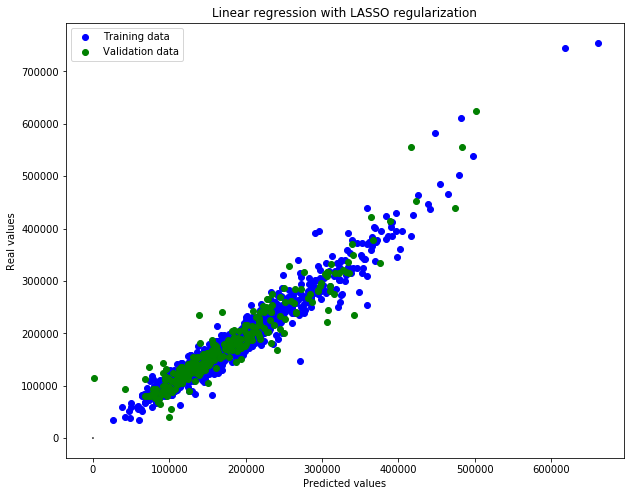

In [766]:
# scatter plot for real vs predicted values

plt.figure(figsize=(10,8))
plt.scatter(train_pred, y_train, c = "blue",  label = "Training data")
plt.scatter(test_pred, y_test, c = "green",  label = "Validation data")
plt.title("Linear regression with LASSO regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10, 14], [10, 14], c = "black")
plt.show()

In [783]:
reg_l.score(X_test,y_test)

0.901219437863555

 - Lasso and Ridge major coefficients

In [767]:
coef_lasso = pd.Series(reg_l.coef_, index = X_train.columns)
coef_lasso

MSZoning_C (all)   -14795.85
MSZoning_FV         18488.57
MSZoning_RH             0.00
MSZoning_RL          2423.86
MSZoning_RM         -3589.96
                      ...   
ScreenPorch            19.19
PoolArea              115.79
MiscVal                -0.04
MoSold               -485.16
YrSold               -325.47
Length: 274, dtype: float64

In [768]:
print("Lasso has remained " + str(sum(coef_lasso != 0)) + " variables and excluded " +  str(sum(coef_lasso == 0)))

Lasso has remained 248 variables and excluded 26


In [778]:
important_coef = coef_lasso.sort_values().tail(20)

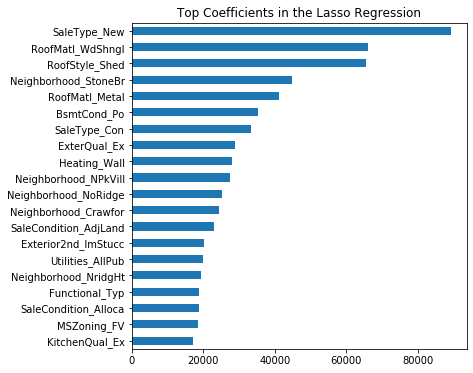

In [779]:
plt.figure(figsize = (6,6))
important_coef.plot(kind = "barh")
plt.title("Top Coefficients in the Lasso Regression")
plt.show()

In [771]:
coef_ridge = pd.Series(reg_r.coef_, index = X_train.columns)
coef_ridge

MSZoning_C (all)   -12406.34
MSZoning_FV         14761.11
MSZoning_RH           330.98
MSZoning_RL          1863.65
MSZoning_RM         -4549.39
                      ...   
ScreenPorch            17.72
PoolArea              124.08
MiscVal                -0.45
MoSold               -477.92
YrSold               -191.44
Length: 274, dtype: float64

In [772]:
print("Ridge has remained " + str(sum(coef_ridge != 0)) + " variables and excluded " +  str(sum(coef_ridge == 0)))

Ridge has remained 270 variables and excluded 4


In [773]:
coef_ridge.sort_values().tail(10)

Heating_Wall           15588.43
Exterior1st_BrkFace    15836.64
Neighborhood_NPkVill   16762.48
Functional_Typ         17213.21
Neighborhood_Crawfor   18195.33
Neighborhood_NoRidge   19300.75
ExterQual_Ex           20160.01
SaleType_New           30177.94
Neighborhood_StoneBr   34970.10
RoofMatl_WdShngl       38349.11
dtype: float64

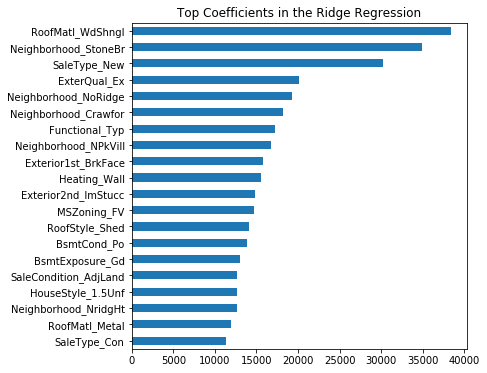

In [780]:
plt.figure(figsize = (6,6))
coef_ridge.sort_values().tail(20).plot(kind = "barh")
plt.title("Top Coefficients in the Ridge Regression")
plt.show()

 - the most importand coefficients were RoofMaterial, Neighborhood, SaleType, Heating and Utilities. No features related to the LotArea, OverallQual or GrLivArea in the top. The model seems to overfit due to the volume of features. Need further review and improvement.

##### Prediction

 - Ridge regression would be used for making a prediction, since there MSE and RMSE has the lowest difference, and Ridge coefficient is the best among the models. 

In [621]:
test1 = test1.drop(['SalePrice'], axis=1)

In [622]:
test1.shape

(1459, 274)

In [623]:
# test1.isna().sum()[test1.isnull().mean() > 0].sort_values(ascending=False)

In [629]:
# RIDGE regression

reg_r = Lasso(alpha=1)
reg_r.fit(X_train, y_train)
test_pred = reg_r.predict(test1)
train_pred = reg_r.predict(X_train)


C:\Users\Katya\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 154822019993.91196, tolerance: 711743969.1690657
  positive)


In [632]:
# prediction
result = reg_r.predict(test1)
submission = pd.DataFrame({'Id':test_id,'SalePrice':result})
# submission.result = submission.Survived.astype(int)
print(submission.shape)
filename = 'Real_estate_price_prediction.csv'
submission.to_csv(filename,index=False)
print('Saved file: ' + filename)

(1459, 2)
Saved file: Real_estate_price_prediction.csv


In [633]:
submission

,Id,SalePrice
0,1461,110606.10
1,1462,158464.89
2,1463,189394.44
3,1464,197218.35
4,1465,200808.65
...,...,...
1454,2915,88133.12
1455,2916,82969.46
1456,2917,177912.44
1457,2918,105366.74
